In [5]:
pip install opencv-python

  Using cached opencv_python-4.5.1.48-cp38-cp38-macosx_10_13_x86_64.whl (40.3 MB)
Note: you may need to restart the kernel to use updated packages.


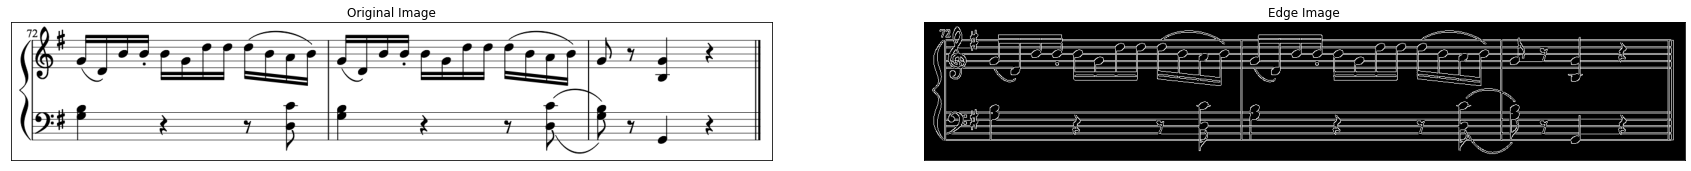

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(30,150))

img = cv2.imread('/Users/sahiltyagi/Downloads/images_and_sample-code/test-images/music1.png',0)
edges = cv2.Canny(img,500,1000)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.imsave('/Users/sahiltyagi/Downloads/images_and_sample-code/test-images/edge_music1.png', edges)

plt.show()

In [104]:
#EVERY ZERO PIXEL IS AN EDGE
import numpy as np

edges = edges.reshape([-1])
add = [x for x in edges]

f = open('/Users/sahiltyagi/Desktop/edgelist.txt', 'w')
for v in add:
    f.write(str(v)+'\n')
    
f.close()

In [87]:
import os
from PIL import Image
import numpy as np
import math

curr_directory = os.getcwd()

In [88]:
def convert_image_to_blacknwhite(image):
    #black_n_white = image.convert('gray')
    #black_n_white.save('bnw.png')
    
    black_white = np.zeros((image.width, image.height))
    for i in range(0, image.width):
        for j in range(image.height):
            r,g,b = image.getpixel((i,j))
            bnw = 0.2989*r + 0.5870*g + 0.1140*b
            black_white[i][j] = int(math.floor(bnw))
    
    new_im = Image.new('L', (black_white.shape[0] , black_white.shape[1]))
    for i in range(0, black_white.shape[0]):
        for j in range(0, black_white.shape[1]):
            new_im.putpixel((i,j), int(black_white[i][j]))
            
    new_im.save('black_n_white.png')
    

In [89]:
note_image = os.path.join('/Users/sahiltyagi/Downloads/images_and_sample-code/test-images/', 'music1.png')
note_image = Image.open(note_image)
convert_image_to_blacknwhite(note_image)


In [98]:
#VERIFY EDGES ARE DETECTED RIGHT AFTER RGB TO BLACK N' WHITE CONVERSION
black_white_threshold = 200
b_image = Image.open('black_n_white.png')
verify_img = Image.new('L', (b_image.width , b_image.height))
verify_arr = np.ones([b_image.width , b_image.height])*255
for i in range(0, b_image.width):
    for j in range(0, b_image.height):
        pixel_val = b_image.getpixel((i,j))
        if pixel_val < black_white_threshold:
            verify_arr[i,j] = pixel_val

for i in range(0, verify_arr.shape[0]):
    for j in range(0, verify_arr.shape[1]):
        verify_img.putpixel((i,j), int(verify_arr[i,j]))

verify_img.save('test_bnw.png')

In [118]:
def hough_transform_space():
    black_white_threshold = 100
    note_image = Image.open('black_n_white.png')
    #print(note_image.width)
    #print(note_image.height)

    accumulator = np.zeros([note_image.width, note_image.height])
    print(accumulator.shape)

    ctr = 0
    for x in range(0, note_image.width):
        for y in range(0, note_image.height):
            pixel_val = note_image.getpixel((x,y))
            if pixel_val < black_white_threshold:
                ctr += 1
                # DETECTING HORIZONTAL LINES ONLY SO SLOPE=0
                m = 0
                b = -m*x + y
                accumulator[x][b] += 1
            
        
    print('total edges in the image: ' + str(ctr))
    return accumulator

In [119]:
accumulator = hough_transform_space()

(1274, 231)
total edges in the image: 16604


In [120]:
accumulator = accumulator*255
new_im = Image.new('L', (accumulator.shape[0] , accumulator.shape[1]))
for i in range(0, accumulator.shape[0]):
    for j in range(0, accumulator.shape[1]):
        new_im.putpixel((i,j), int(accumulator[i,j]))
        
new_im.save('hough_out.png')